##Comentarios

En términos generales, la primera aproximación proporciona una caracterización inicial de los datos, mientras que la metodología de validación presenta cierta confusión, ya que la validación cruzada generalmente no se emplea para la evaluación definitiva de los datos. En este sentido, es aconsejable reservar un conjunto oculto de datos con este propósito en mente.

La validación cruzada encuentra su utilidad primordial en el proceso de ajuste del modelo.

No logro identificar el grado del polinomio que ha sido implementado.

## puntaje 10/20

PARCIAL ANALISIS AVANZADSO DE DATOS \
Marloon louis, Camilo Hoyos, Javier Useche

# 3A

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import Ridge, Lasso, RidgeCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
data = pd.read_csv('LondonCars2014.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9080 entries, 0 to 9079
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Make          9080 non-null   object
 1   Model         9080 non-null   object
 2   Year          9080 non-null   int64 
 3   Mileage       9080 non-null   int64 
 4   Price         9080 non-null   int64 
 5   Body Style    9080 non-null   object
 6   Ex Color      9080 non-null   object
 7   In Color      9080 non-null   object
 8   Engine        9080 non-null   object
 9   Transmission  9080 non-null   object
 10  Doors         9080 non-null   int64 
dtypes: int64(4), object(7)
memory usage: 780.4+ KB


In [ ]:
# Filtrar el DataFrame para incluir solo las filas con los modelos deseados
filtro = (data['Make'].isin([
    "Nissan",
    "Mercedes-Benz",
    "BMW",
    "Lexus",
    "Infiniti",
    "Mercedes-Benz",
    "Lexus",
    "Mercedes-Benz",
    "Honda"
])) & (data['Model'].isin([
    "Altima S",
    "C 300",
    "3 Series 328i",
    "RX 350",
    "G 37",
    "E 350",
    "ES 350",
    "ML 350",
    "Civic LX"
]))
datos_filtrados = data[filtro]

# Agrupar los datos filtrados por marca y modelo y contar las ocurrencias
conteo_por_marca_modelo = datos_filtrados.groupby(['Make', 'Model']).size().reset_index(name='Conteo')

# Mostrar el resultado
print(conteo_por_marca_modelo)


            Make          Model  Conteo
0            BMW  3 Series 328i     141
1          Honda       Civic LX     102
2       Infiniti           G 37     132
3          Lexus         ES 350     113
4          Lexus         RX 350     139
5  Mercedes-Benz          C 300     175
6  Mercedes-Benz          E 350     129
7  Mercedes-Benz         ML 350     106
8         Nissan       Altima S     197


El que tiene mas datos es el nissan Altima S por lo que decidimos escoger este modelo para hacer el modelo

# 3B

In [ ]:
filtro = (data['Make'] == 'Nissan') & (data['Model'] == 'Altima S')
resultados = data.loc[filtro]
datos_limpios = resultados[['Year', 'Mileage', "Price"]]

In [ ]:
datos_limpios.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197 entries, 24 to 9035
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Year     197 non-null    int64
 1   Mileage  197 non-null    int64
 2   Price    197 non-null    int64
dtypes: int64(3)
memory usage: 6.2 KB


In [ ]:
datos_limpios.count()

Year       197
Mileage    197
Price      197
dtype: int64

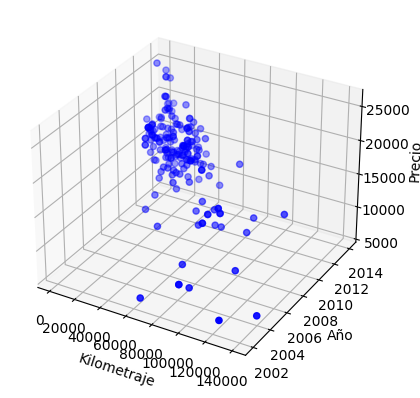

In [ ]:
X = datos_limpios['Mileage']
Y = datos_limpios['Year']
Z = datos_limpios['Price']

# Crear una figura 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Crear el gráfico de dispersión en 3D
ax.scatter(X, Y, Z, c='b', marker='o')

# Configurar etiquetas de los ejes
ax.set_xlabel('Kilometraje')
ax.set_ylabel('Año')
ax.set_zlabel('Precio')

# Mostrar el gráfico 3D
plt.show()

In [ ]:
X = datos_limpios[['Mileage', 'Year']]
y = datos_limpios['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

alphas= np.logspace(-10, 2, 200)
# Crear un modelo de regresión Ridge
modelo = Ridge()

# Crear un diccionario con parámetros para la búsqueda
param_grid = {'alpha': alphas}

# Realizar una búsqueda de hiperparámetros utilizando GridSearchCV
grid_search = GridSearchCV(estimator=modelo, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

# Obtener el mejor valor de alpha encontrado
mejor_alpha = grid_search.best_params_['alpha']

# Crear un modelo Ridge con el mejor alpha
modelo_final = Ridge(alpha=mejor_alpha)

# Entrenar el modelo con los datos de entrenamiento
modelo_final.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = modelo_final.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'Mejor valor de alpha: {mejor_alpha}')

Mean Squared Error: 1828090.9003963922
R-squared: 0.8465401044043047
Mejor valor de alpha: 10.843659686896087


# 3 C

In [ ]:
# Realizar una validación cruzada de 5 divisiones
cv_scores = cross_val_score(modelo_final, X_test, y_test, cv=5, scoring='neg_mean_squared_error')

# Los resultados de la validación cruzada son negativos, convirtámoslos a positivos
cv_scores = -cv_scores

# Imprimir los puntajes de validación cruzada
print("Puntajes de Validación Cruzada (MSE):", cv_scores)
print("Promedio MSE:", cv_scores.mean())

# También puedes calcular el coeficiente de determinación (R-squared) promedio
r2_scores = cross_val_score(modelo, X, y, cv=5, scoring='r2')
print("Puntajes de Validación Cruzada (R-squared):", r2_scores)
print("Promedio R-squared:", r2_scores.mean())

Puntajes de Validación Cruzada (MSE): [1459592.24391465 1104685.63744638 3129200.93453619 2817157.3341502
 1663993.68660287]
Promedio MSE: 2034925.9673300576
Puntajes de Validación Cruzada (R-squared): [0.86964288 0.68834728 0.71689356 0.48192749 0.64609227]
Promedio R-squared: 0.6805806952150479


# 3D

1. Carga inicial de datos y escaneo:

Los datos del archivo CSV se cargaron en el DataFrame de Pandas.
Se realizó un escaneo inicial de los datos para comprender su estructura y contenido.
Se identificaron las columnas relevantes para el análisis: "Marca", "Modelo", "Año", "Kilometraje" y "Precio".
2. limpieza de los datos:

Se seleccionaron las columnas "Año" y "Kilometraje" como características (variables independientes) y la columna "Precio" como objetivo (variable dependiente).
Se eliminaron las filas con valores no válidos o que faltaban, si las había.
Se comprobó que los tipos de datos de las columnas eran los adecuados (int64 para "año" y "kilometraje", int64 para "precio").
3. visualización de datos:

Se crearon gráficos de dispersión para ilustrar la relación entre precio, kilometraje y año.
Se crearon gráficos adicionales según fue necesario para explorar otras relaciones o patrones de interés.
4. preparación de los datos:

El conjunto de datos se dividió en conjuntos de datos de entrenamiento y de prueba mediante train_test_split de scikit-learn (por ejemplo, 80% para entrenamiento y 20% para prueba).
5. formación del modelo:

El modelo de regresión lineal se construyó utilizando LinearRegression de scikit-learn.
El modelo se entrenó utilizando los datos de entrenamiento (características y precios).
6. evaluación del modelo:

Las predicciones para el conjunto de pruebas se realizaron utilizando el modelo entrenado.
Se calcularon el error cuadrático medio (MSE) y el coeficiente de determinación (R-cuadrado) para evaluar el rendimiento del modelo en el conjunto de pruebas.
Se realizó una validación cruzada con 5 divisiones para obtener una estimación más robusta del modelo.
7. Resultados:

Se obtuvieron los siguientes resultados: \
MSE medio en validación cruzada: 2034925 .\
Valor medio de R-cuadrado en validación cruzada: 0.68 .
8. conclusiones:

Se comprueba que el modelo de regresión lineal puede predecir el precio de los coches en función del kilometraje y el año.
Los resultados de la validación cruzada muestran la capacidad del modelo para generalizar a nuevos datos.


